# Numerical Iterative Methods for Poisson Equation

We study the numerical solution of the 1D Poisson equation to investigate the efficiency of various iterative solvers.

## Problem Setup

Solve:  
$$
-u''(x) = f(x), \quad x \in (0,1), \quad u(0) = u(1) = 0
$$

Using second-order finite differences with spacing $h = \frac{1}{N}$:
$$
- \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} = f_i, \quad i = 1,\dots,N-1
$$

Letting $u = (u_1, \dots, u_{N-1})^T$, we obtain:
$$
Au = f
$$

Where $A \in \mathbb{R}^{(N-1)\times(N-1)}$ is:
$$
A = \frac{1}{h^2}
\begin{bmatrix}
2 & -1 &   &        &        \\
-1 & 2 & -1 &        &        \\
   & \ddots & \ddots & \ddots & \\
   &        & -1 & 2 & -1     \\
   &        &    & -1 & 2
\end{bmatrix}
$$

---

## Jacobi Method

Each node is updated using only old values:
$$
u_i^{(k+1)} = \frac{1}{2}(h^2 f_i + u_{i-1}^{(k)} + u_{i+1}^{(k)})
$$

Matrix form:
$$
u^{(k+1)} = D^{-1}(L + U)u^{(k)} + D^{-1}f
$$

Let $A = D - (L + U)$, then iteration matrix:
$$
D=\frac{1}{h^{2}}\left(\begin{array}{cccccc}
2 & & & & & & \\
& 2 & & & & & \\
& & 2 & & & & \\
& & & 2 & & & \\
& & & & 2 & & \\
& & & & & 2 &  \\
& & & & & & 2
\end{array}\right) ,
L+U=\frac{1}{h^{2}}\left(\begin{array}{cccccc}
0 & 1 & & & & & \\
1 & 0 & 1 & & & & \\
& 1 & 0 &1 & & & \\
& & 1 & 0 & 1 & & \\
& & & 1 & 0 & 1 & \\
& & & & 1 & 0 & 1  \\
& & & & & 1 & 0
\end{array}\right) ,
$$

$$
R_J = D^{-1}(L + U), \quad e^{(k+1)} = R_J e^{(k)}
$$

Jacobi convergence depends on the spectral radius:  
$$
\rho(R_J) < 1
$$

---

## Weighted Jacobi Method

Introduce relaxation parameter $\omega$:
$$
u_i^{(k+1)} = \omega \cdot \frac{1}{2}(h^2 f_i + u_{i-1}^{(k)} + u_{i+1}^{(k)}) + (1 - \omega) u_i^{(k)}
$$

Matrix form:
$$
u^{(k+1)} = R_\omega u^{(k)} + \omega D^{-1} f
$$
where
$$
R_\omega = (1 - \omega)I + \omega R_J
$$

Error propagation:
$$
e^{(k+1)} = R_\omega e^{(k)}
$$

---

## Gauss-Seidel Method

Update nodes sequentially, using latest available values:
$$
u_i^{(k+1)} = \frac{1}{2}(h^2 f_i + u_{i-1}^{(k+1)} + u_{i+1}^{(k)})
$$

Matrix form:
$$
(D - L)u^{(k+1)} = U u^{(k)} + f
$$

Iteration matrix:
$$
R_G = (D - L)^{-1} U, \quad e^{(k+1)} = R_G e^{(k)}
$$

---

## Red-Black Gauss-Seidel

A parallel version of Gauss-Seidel using even/odd splitting:

- **Red points** (even indices):
  $$
  u_{2i}^{(k+1)} = \frac{1}{2}(h^2 f_{2i} + u_{2i-1}^{(k)} + u_{2i+1}^{(k)})
  $$

- **Black points** (odd indices):
  $$
  u_{2i+1}^{(k+1)} = \frac{1}{2}(h^2 f_{2i+1} + u_{2i}^{(k+1)} + u_{2i+2}^{(k+1)})
  $$

Red-black ordering improves parallel efficiency and convergence.

---

## Summary

| Method              | Update Type          | Iteration Matrix         | Convergence Speed |
|---------------------|----------------------|---------------------------|--------------------|
| Jacobi              | Full old values      | $R_J = D^{-1}(L+U)$       | Slow               |
| Weighted Jacobi     | Relaxed old values   | $R_\omega=(1 - \omega)I + \omega R_J$                | Better (if tuned)  |
| Gauss-Seidel        | Forward substitution | $R_G = (D-L)^{-1}U$       | Faster             |
| Red-Black G-S       | Alternating sweeps   | -                         | Parallel-friendly  |

---

## Fundamental Theorem of Iteration

- A stationary iteration of the form:

$$
v^{(n)} = R v^{(n-1)} + g
$$
has the error update:
$$
e^{(n)} = R^n e^{(0)}
$$

- **Convergence condition**:  
  The iteration converges for any initial error if and only if:
  $$
\rho(R) < 1
  $$ 
  where $\rho(R)$ is the **spectral radius** (the largest magnitude of R's eigenvalues).

- **Convergence factor**:  
  $\rho(R)$ also determines the convergence speed — smaller means faster convergence.

- **Different Frequency**:
    High Frequency errors is exist in the nearby gird so that the traditional iteration methods like G-S, Jacobi can get earsily, but the low frequency is in the larger gird even all over grid, these method can't solve this problem.

---

## Multi-Grid Method

As above statements, the high frequency error in small grid can be easily eliminated by iterations but the low frequency can be solved.
If we can transport the low frequency error into high frequency error, then the problem can be solved.

This is a fundamental component of the multigrid algorithm, designed to accelerate the solution of linear systems like $A_h u = f$, especially those arising from PDE discretization.

### Steps:

1. **Pre-smoothing**
   - Perform $\alpha_1$ relaxation sweeps (e.g., Jacobi or Gauss-Seidel) on the fine grid $\Omega_h$.
   - Solve:
     $$
     A_h u = f
     $$
     with an initial guess $v_h$.
   - Obtain the pre-smoothed solution $v_h$.

2. **Compute Residual**
   - Compute the residual on the fine grid:
     $$
     r_h = f - A_h v_h
     $$
where, the $r_h$ is mean to the low frequency error on the fine grid.

3. **Restrict Residual**
   - Restrict the residual from the fine grid to the coarse grid:
     $$
     r_{2h} = I_h^{2h} r_h
     $$
   - where $I_h^{2h}$ is the **restriction operator**, becuase of the known boundary value so this operator is just for internal points.
**Here I have questions:** If the boundary is Neuman, such like:$\frac{\partial u}{\partial n} = 0$, which means the boundary value is determined by the nearby internal points, maybe we can't ingore the boundary points in restriction?

4. **Solve Error Equation on Coarse Grid**
   - Solve the error equation on the coarse grid:
     $$
     A_{2h} e_{2h} = r_{2h}
     $$
Here, the error is transported the high frequency error on the coarse grid.

5. **Correct Fine Grid Solution**
   - Interpolate the coarse-grid error back to the fine grid and correct:
     $$
     v_h \leftarrow v_h + I_{2h}^h e_{2h}
     $$
   - where $I_{2h}^h$ is the **prolongation operator**.

6. **Post-smoothing**
   - Perform $\alpha_2$ relaxation sweeps on the fine grid again using the updated $v_h$ as the initial guess.

### V-cycle vs. Full Multigrid (FMG)

Multigrid methods efficiently solve large linear systems, especially those arising from discretized partial differential equations. Two key strategies are:

- **V-cycle**: Focuses on reducing current error in a recursive multilevel manner.
- **Full Multigrid (FMG)**: Aims to compute a highly accurate initial guess using multigrid levels.

---

#### 🔁 V-cycle

##### ✅ Purpose
Reduce the error in an approximate solution at a given fine grid level using recursive coarse-grid corrections.

##### ⚙️ Steps
1. **Pre-smoothing**:  
   Perform α₁ relaxation sweeps on the fine grid:
   $$
   A_h u = f \quad \text{with initial guess } v_h
   $$

2. **Compute residual**:
   $$
   r_h = f - A_h v_h
   $$

3. **Restrict residual** to the coarse grid:
   $$
   r_{2h} = I_h^{2h} r_h
   $$

4. **Solve coarse-grid error equation** (recursively or directly if coarsest grid):
   $$
   A_{2h} e_{2h} = r_{2h}
   $$

5. **Correct fine-grid solution**:
   $$
   v_h \leftarrow v_h + I_{2h}^h e_{2h}
   $$

6. **Post-smoothing**:  
   Perform α₂ additional relaxation sweeps:
   $$
   A_h u = f \quad \text{with initial guess } v_h
   $$

##### Cost
- In 1D: ~4 WU (Work Units)
- In 2D: ~8/3 WU
- In 3D: ~16/7 WU  
(WU = one relaxation sweep on fine grid)

---

#### Full Multigrid (FMG)

##### Purpose
Compute a highly accurate initial guess efficiently by solving the problem on coarse grids and interpolating up.

##### Steps
1. Start from the **coarsest grid**, solve:
   $$
   A_{H} u_{H} = f_{H}
   $$

2. **Interpolate** solution to the next finer grid and use as initial guess.

3. At each level:
   - Use a **V-cycle** to solve:
     $$
     A_h u_h = f_h
     $$
     using the interpolated solution as the initial guess.

4. Repeat until the finest grid is reached.

##### Cost
- Slightly more expensive than a single V-cycle, but:
  - Total cost ≈ 1–2 V-cycles
  - Significantly more accurate than direct V-cycle
  - Often converges in **1 FMG cycle**

---

#### Summary

| Feature          | V-cycle                | Full Multigrid (FMG)           |
|------------------|------------------------|-------------------------------|
| Goal             | Reduce error           | Compute accurate initial guess |
| Uses V-cycle?    | Yes                    | Yes (nested at each level)     |
| Recursion        | Yes                    | Yes                            |
| Cost             | 1 V-cycle              | ≈ 1–2 V-cycles                 |
| Accuracy         | Moderate               | High                           |
| When to use      | Iterative refinement   | Initializing or final solve    |

#### Building the Coarse Grid Operator $A_{2h}$

In multigrid methods, the **coarse grid operator** $A_{2h}$ plays a central role in solving the residual equation on a coarser level. This operator is not simply a redefinition of the differential operator on a coarser grid — it must be constructed consistently from the fine-grid operator $A_{2h}$ to maintain accuracy and convergence.

---

##### Residual Equation on the Coarse Grid

We begin with the **residual equation** on the fine grid:

$$
A_h u_h = f_h \quad \Rightarrow \quad r_h = f_h - A_h v_h
$$

To solve the error equation on the coarse grid, we use:

$$
A_{2h} u_{2h} = I^{2h}_h r_h
$$

Where:
- $I^{2h}_h$ is the **restriction operator** (fine to coarse).
- $u_{2h}$ is the approximation to the coarse-grid error.
- $r_h$ is the residual on the fine grid.

---

##### Defining the Coarse Grid Operator

To compute $A_{2h}$, we apply a **Galerkin projection** of the fine grid operator:

$$
A_{2h} = I^{2h}_h A_h I^h_{2h}
$$


This formula ensures consistency between levels by defining $A_{2h}$ based on the structure of $A_{h}$.

---

##### Why Use Galerkin Projection?

- It guarantees symmetry and positive definiteness (if $A_{2h}$ has those properties).
- It ensures the multigrid correction behaves well.
- It provides a natural way to define $A_{2h}$ without re-discretizing the PDE.

---


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import lil_matrix

class Poisson1DSolver:
    def __init__(self, N, sigma=0.0):
        self.N = N
        self.lamda = 2
        self.N_coarse = int(self.N / self.lamda)
        self.h = 1.0 / N
        self.sigma = sigma
        self.x = np.linspace(0, 1, N + 1)
        self.u = np.zeros(N + 1)
        self.f = np.sin(np.pi * self.x)
        self.A = self.construct_matrix()

    def construct_matrix(self):
        h2 = self.h ** 2
        size = self.N - 1
        A = 2 * np.eye(size) + self.sigma * h2 * np.eye(size)
        for i in range(size - 1):
            A[i, i + 1] = A[i + 1, i] = -1
        return A / h2
        
    def plot_error_decay_vs_spectral_radius(self):
        rhos=[0.95, 0.75, 0.5, 0.25]
        steps=30
        plt.figure(figsize=(5, 3))
        for rho in rhos:
            errors = [rho ** k for k in range(steps)]  # 设初始误差为1
            plt.plot(errors, label=f"$\\rho = {rho}$")
        plt.yscale("log")
        plt.xlabel("Iteration step $k$")
        plt.ylabel("Error $||e^{(k)}||$ (log scale)")
        plt.title("Error Decay vs Spectral Radius $\\rho$")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    def jacobi(self, max_iter=1000, tol=1e-8):
        u = self.u[1:-1]
        f = self.f[1:-1]
        D = np.diag(np.diag(self.A))
        R =  D -self.A
        invD = np.linalg.inv(D)
        RJ = invD @ R
        errors = []
        for _ in range(max_iter):
            u_new = invD @ f + RJ @ u
            err = np.linalg.norm(u_new - u)
            errors.append(err)
            if err < tol:
                break
            u = u_new
        self.u[1:-1] = u
        return errors
        
    def weighted_jacobi(self,omega = 0.5,max_iter=1000,tol = 1e-8):
        u = self.u[1:-1]
        f = self.f[1:-1]
        D = np.diag(np.diag(self.A))
        R = D - self.A
        invD = np.linalg.inv(D)
        RJ = invD @ R
        RW = np.eye(self.N-1) * (1-omega)  + omega * RJ
        errors = []
        for _ in range(max_iter):
            u_new = omega * invD @ f + RW @ u
            err = np.linalg.norm(u_new - u)
            errors.append(err)
            if err < tol:
                break
            u = u_new
        self.u[1:-1] = u
        return errors
            

    def gauss_seidel_matrix_form(self, max_iter=1000, tol=1e-8):
        u = self.u[1:-1]
        f = self.f[1:-1]

        # 矩阵分解 A = D - L - U
        D = np.diag(np.diag(self.A))
        L = -np.tril(self.A, -1)
        U = -np.triu(self.A, 1)

        DL_inv = np.linalg.inv(D - L)  # (D - L)^(-1)
        RG = DL_inv @ U               # 迭代矩阵 R_G
        F_term = DL_inv @ f           # 常数项 (D - L)^(-1)f

        errors = []
        for _ in range(max_iter):
            u_new = F_term + RG @ u
            err = np.linalg.norm(u_new - u)
            errors.append(err)
            if err < tol:
                break
            u = u_new

        self.u[1:-1] = u
        return errors

    def red_black_gauss_seidel(self, max_iter=1000, tol=1e-8):
        u = self.u
        f = self.f
        h2 = self.h ** 2
        errors = []

        for _ in range(max_iter):
            u_old = u.copy()
            # 红点更新（偶数编号）
            for i in range(len(u)):
                if i % 2 == 0:
                    left = u[i - 1] if i > 0 else self.u[0]
                    right = u[i + 1] if i < len(u) - 1 else self.u[len(self.u)-1]
                    u[i] = 0.5 * (h2 * f[i] + left + right)

            # 黑点更新（奇数编号）
            for i in range(len(u)):
                if i % 2 == 1:
                    left = u[i - 1] if i > 0 else self.u[0]
                    right = u[i + 1] if i < len(u) - 1 else self.u[len(self.u)-1]
                    u[i] = 0.5 * (h2 * f[i] + left + right)

            err = np.linalg.norm(u - u_old)
            errors.append(err)
            if err < tol:
                break

        self.u[1:-1] = u[1:-1]
        return

    def prolongation_matrix_lh_to_h(self,N_fine,N_coarse):
        n_coarse = N_coarse - 1 #number of points
        n_fine = N_fine - 1
        P = lil_matrix((n_fine, n_coarse))

        for i in range(n_coarse):
            j = i * 2
            P[j+1, i] = 1.0
            if 0<j<n_fine-1 and 0<i:
                P[j, i-1] = 0.5
                P[j,i] = 0.5
            else:
                P[j, i] = 0.5
        P[n_fine-1,n_coarse-1] = 0.5
        # Last fine grid point aligns with last coarse point
        print(P.tocsr().toarray())
        return P.tocsr()
        
    def prolong(self, e,N_fine,N_coarse):
        
        P = self.prolongation_matrix_lh_to_h(N_fine,N_coarse)
        e_new = np.array(list(e))
        ef = P.toarray() @ e_new
        return ef

    def restriction_matrix_full_weighting_general(self,N_fine,N_coarse):
        n_coarse_internal = N_coarse-1
        n_fine_internal = N_fine - 1
        R = lil_matrix((n_coarse_internal, n_fine_internal))
        for i in range(n_coarse_internal):
            j = i * 2  # fine-grid index corresponding to coarse-grid point
            R[i, j + 1] = 1 / 2
            R[i, j + 2] = 1 / 4
            R[i, j] = 1 / 4
        print(R.tocsr().toarray())
        return R.tocsr()

        
    def restrict(self, r,N_fine,N_coarse):
        R = self.restriction_matrix_full_weighting_general(N_fine,N_coarse)
        r_c = R.toarray() @ r
        return r_c

    def residual(self, A,u,f):
        return f - A @ u# which ingore the internal points!

    def MG_V(self,level_number):
        self.u = np.zeros(N + 1)# initial again
        u = self.u[1:-1]
        f = self.f[1:-1]

    def multigrid_vcycle(self, u=None, f=None, level=0):
        
        r = self.residual(u, f)
        r_padded = np.pad(r, (1, 1), mode='edge')
        r_c = self.restrict(r_padded)

        A_c = Poisson1DSolver(len(r_c) + 1)
        e_c = A_c.multigrid_vcycle(np.zeros(len(r_c)), r_c, level + 1)

        e_f = self.prolong(e_c)
        u += e_f

        for _ in range(3):
            u = self.jacobi_step(u, f)
        return u

    def solve_multigrid(self):
        u = self.multigrid_vcycle()
        self.u[1:-1] = u

    def plot_solution(self, label=''):        
        plt.plot(self.x, self.u, label=label)
        plt.xlabel("x")
        plt.ylabel("u")
        plt.grid(True)
        plt.legend()

    def plot_fft(self, title='Error Spectrum'):
        u_exact = np.sin(np.pi * self.x) / (np.pi ** 2 + self.sigma)
        error = self.u - u_exact
        fft_error = np.abs(np.fft.fftshift(np.fft.fft(error[1:-1])))
        freq = np.fft.fftshift(np.fft.fftfreq(len(error[1:-1]), d=self.h))
        plt.plot(freq, np.log10(fft_error + 1e-14))
        plt.title(title)
        plt.xlabel('Frequency')
        plt.ylabel('log10(|FFT|)')
        plt.grid(True)
        plt.show()


In [52]:
poisson = Poisson1DSolver(N=8)
poisson.prolongation_matrix_lh_to_h(16,8)
poisson.restriction_matrix_full_weighting_general(16,8)

[[0.5 0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.5]]
[[0.25 0.5  0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   0.   0.25 0.5  0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.   0.   0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.5  0.25 0.
  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25

<7x15 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

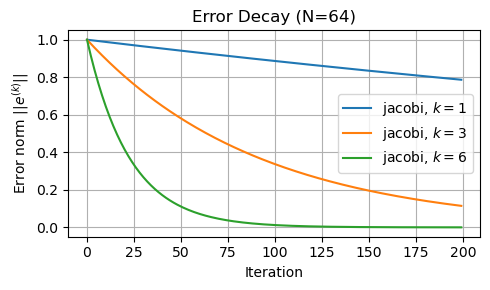

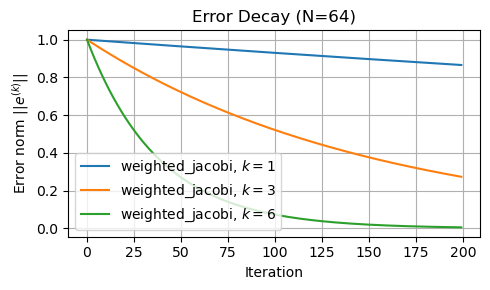

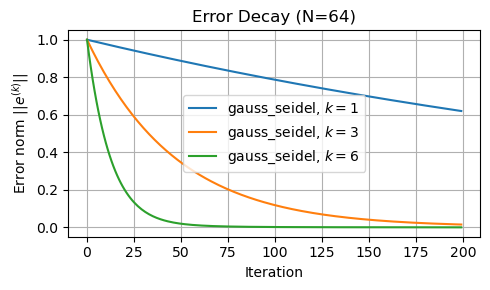

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def init_error(N, k):
    x = np.linspace(0, 1, N + 1)
    e = np.sin(k * np.pi * x)
    e[0] = e[-1] = 0  # 边界置零
    return e / np.linalg.norm(e)  # 归一化

def run_solver_with_error(solver_class, method_name, N, k, omega=0.8):
    solver = solver_class(N)
    solver.u = init_error(N, k)  # 初始误差形状
    solver.f = np.zeros(N+1)

    # 选方法
    if method_name == 'jacobi':
        return solver.jacobi(max_iter=200)
    elif method_name == 'weighted_jacobi':
        return solver.weighted_jacobi(omega=omega, max_iter=200)
    elif method_name == 'gauss_seidel':
        return solver.gauss_seidel_matrix_form(max_iter=200)
    elif method_name == 'multigrid':
        errors = []
        u = solver.u[1:-1]
        for _ in range(30):
            u_new = solver.multigrid_vcycle(u, solver.f[1:-1])
            err = np.linalg.norm(u_new - u)
            errors.append(err)
            u = u_new
        return errors
    else:
        raise ValueError("Unknown method")

def plot_comparison(N, methods, ks, omega=0.8):
    plt.figure(figsize=(5, 3))
    for method in methods:
        for k in ks:
            errors = run_solver_with_error(Poisson1DSolver, method, N, k, omega=omega)
            #print(errors,'---- ---- ----')
            plt.plot(errors / errors[0], label=f'{method}, $k={k}$')
    #plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Error norm $||e^{(k)}||$')
    plt.title(f'Error Decay (N={N})')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 你已有的类，确保它叫 Poisson1DSolver（略去此处重复）
# 请将你提供的 Poisson1DSolver 类定义放在这段代码前面

# 运行对比实验
methods = ['jacobi']
ks = [1, 3, 6]
plot_comparison(N=64, methods=methods, ks=ks, omega=0.6)

# 运行对比实验
methods = ['weighted_jacobi']
ks = [1, 3, 6]
plot_comparison(N=64, methods=methods, ks=ks, omega=0.6)

# 运行对比实验
methods = [ 'gauss_seidel']
ks = [1, 3, 6]
plot_comparison(N=64, methods=methods, ks=ks, omega=0.6)


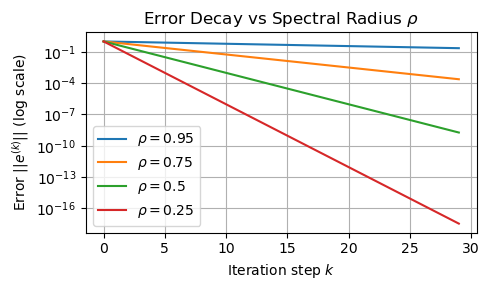

ValueError: operands could not be broadcast together with shapes (4,) (3,) (4,) 

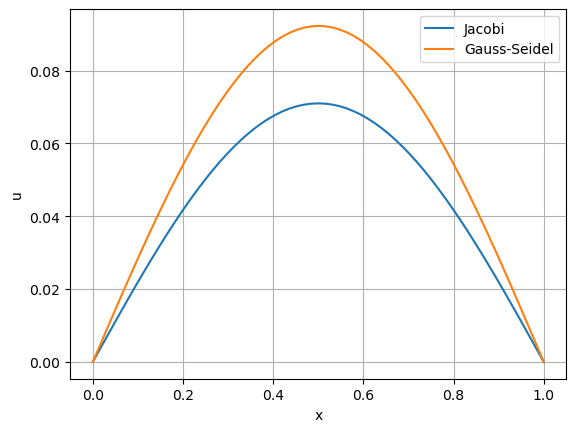

In [19]:
solver = Poisson1DSolver(N=64, sigma=0)
solver.plot_error_decay_vs_spectral_radius()
errors_jacobi = solver.jacobi()
solver.plot_solution('Jacobi')

solver = Poisson1DSolver(N=64, sigma=0)
errors_gs = solver.gauss_seidel()
solver.plot_solution('Gauss-Seidel')

solver = Poisson1DSolver(N=64, sigma=0)
solver.solve_multigrid()
solver.plot_solution('Multigrid')

plt.title('Numerical Solutions')
plt.show()

solver.plot_fft('FFT of Multigrid Error')
